# Credit Card Fraud Detention Project #
                                                           by Dayanand and Anto

###  Problem Statement: Although digital transactions in India registered a 51% growth in 2018-19, their safety remains a concern. Fraudulent activities have increased several fold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day

# Data Preparation

In [1]:
# Lets import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', None)

from scipy.stats import norm
from scipy import stats

In [2]:
crd_df = pd.read_csv("creditcard.csv")

In [3]:
# head
crd_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
crd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Shape of data frame
crd_df.shape

(284807, 31)

In [7]:
crd_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.768627e-15  9.170318e-16 -1.810658e-15  1.693438e-15  1.479045e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.482336e-15  1.392007e-15 -7.528491e-16  4.328772e-16  9.049732e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.085503e-16  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

# EDA

In [8]:
# Display all unique values of numerical data set
def DispNumVal(colName):
    print('%s values :-' % colName)
    print(crd_df[colName].unique())
    print('\n')
    

[ DispNumVal(item) for item in crd_df.columns]

Time values :-
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]


V1 values :-
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]


V2 values :-
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]


V3 values :-
[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]


V4 values :-
[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]


V5 values :-
[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]


V6 values :-
[ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]


V7 values :-
[ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]


V8 values :-
[ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]


V9 values :-
[ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]


V10 values :-
[ 0.09079417 -0.16697441  0.20764287 ... -0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
# head
crd_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

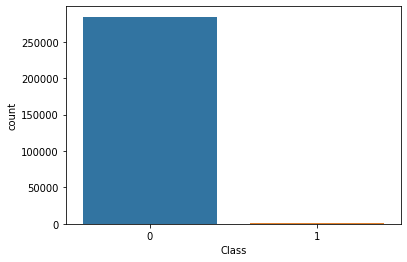

In [10]:
sns.countplot(crd_df['Class'])

In [11]:
crd_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Identifying class imbalance
crd_df['Class'].value_counts()/crd_df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

### As we can see, class is highlly imbalanced. only 0.17% is of fraud transaction class

# Missing Values

In [13]:
crd_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [1]:
# None of the columns have any missing values

In [14]:
crd_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

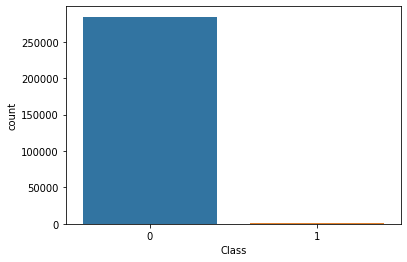

In [15]:
sns.countplot(crd_df['Class'])

In [16]:
crd_df['Amount'].describe()
# No negative values so doesnt look like there are any data issues. We will further review to check outliers

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


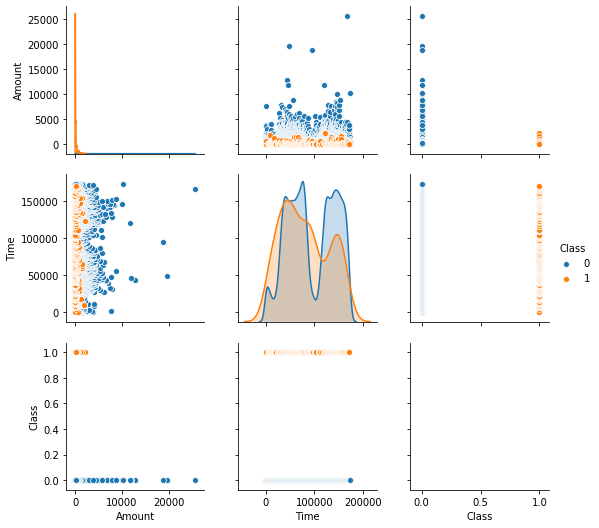

In [17]:
sns.pairplot(data=crd_df[['Amount','Time','Class']],hue='Class')

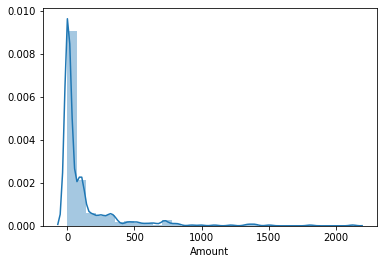

In [18]:
sns.distplot(crd_df[crd_df['Class']==1].Amount,bins = 30)

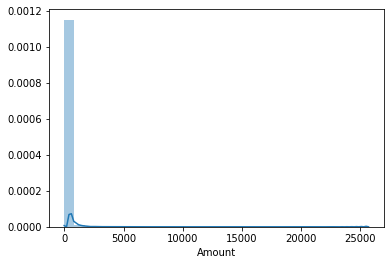

In [19]:
sns.distplot(crd_df[crd_df['Class']==0].Amount,bins = 30)

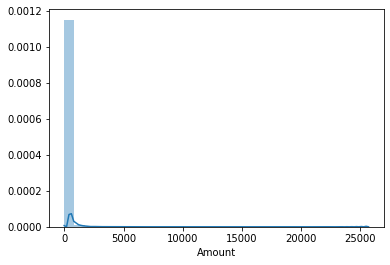

In [20]:
sns.distplot(crd_df['Amount'],bins =30)

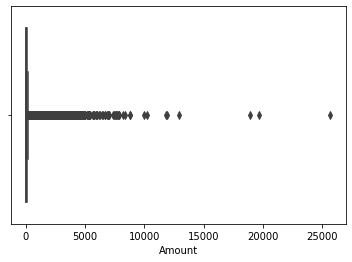

In [21]:
sns.boxplot(crd_df['Amount'])

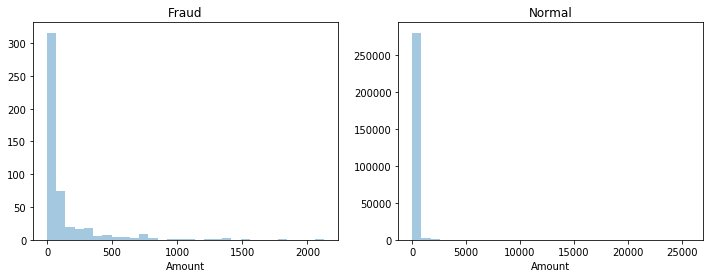

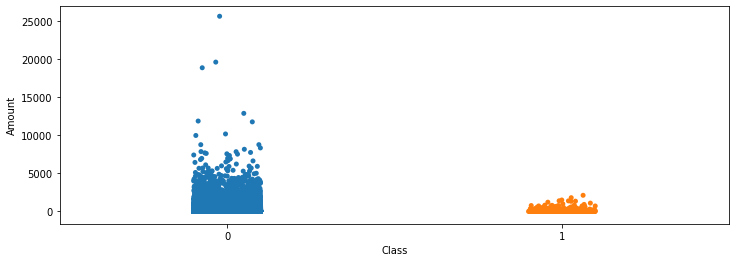

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(crd_df[crd_df['Class']==1].Amount, bins = 30, ax = axes[0], kde = False)
ax.set_title('Fraud')
ax = sns.distplot(crd_df[crd_df['Class']==0].Amount, bins = 30, ax = axes[1], kde = False)
ax.set_title('Normal')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))

sns.stripplot(x='Class', y='Amount', data=crd_df, jitter=True, edgecolor="gray")

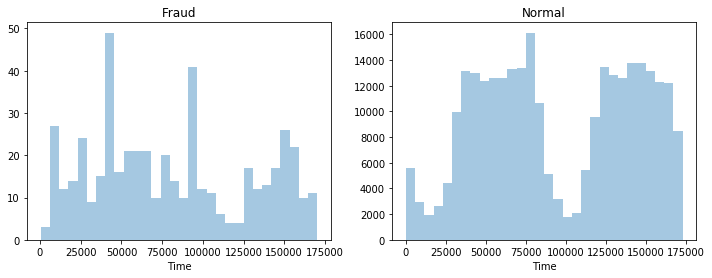

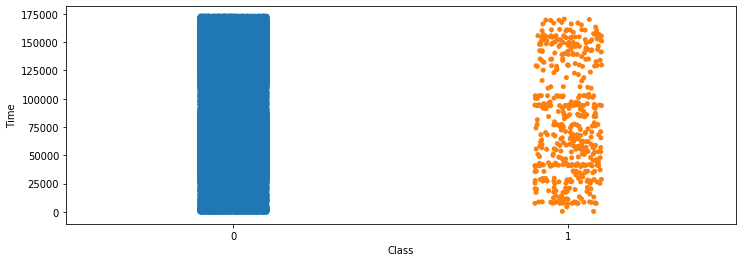

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(crd_df[crd_df['Class']==1].Time, bins = 30, ax = axes[0], kde = False)
ax.set_title('Fraud')
ax = sns.distplot(crd_df[crd_df['Class']==0].Time, bins = 30, ax = axes[1], kde = False)
ax.set_title('Normal')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))

sns.stripplot(x='Class', y='Time', data=crd_df, jitter=True, edgecolor="gray")

In [24]:
crd_df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [25]:
# Convert time to hours and then to days
crd_df['Time'] = crd_df['Time']/3600
crd_df['Time'] = crd_df['Time']/24

In [26]:
crd_df['Time'].describe()

count    284807.000000
mean          1.097383
std           0.549631
min           0.000000
25%           0.627332
50%           0.980231
75%           1.612506
max           1.999907
Name: Time, dtype: float64

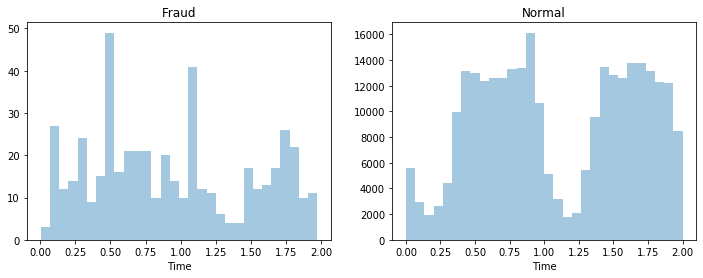

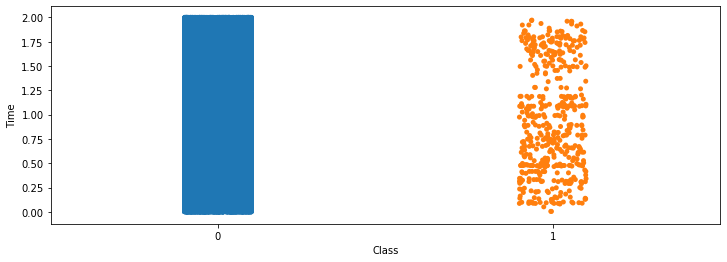

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(crd_df[crd_df['Class']==1].Time, bins = 30, ax = axes[0], kde = False)
ax.set_title('Fraud')
ax = sns.distplot(crd_df[crd_df['Class']==0].Time, bins = 30, ax = axes[1], kde = False)
ax.set_title('Normal')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.stripplot(x='Class', y='Time', data=crd_df, jitter=True, edgecolor="gray")

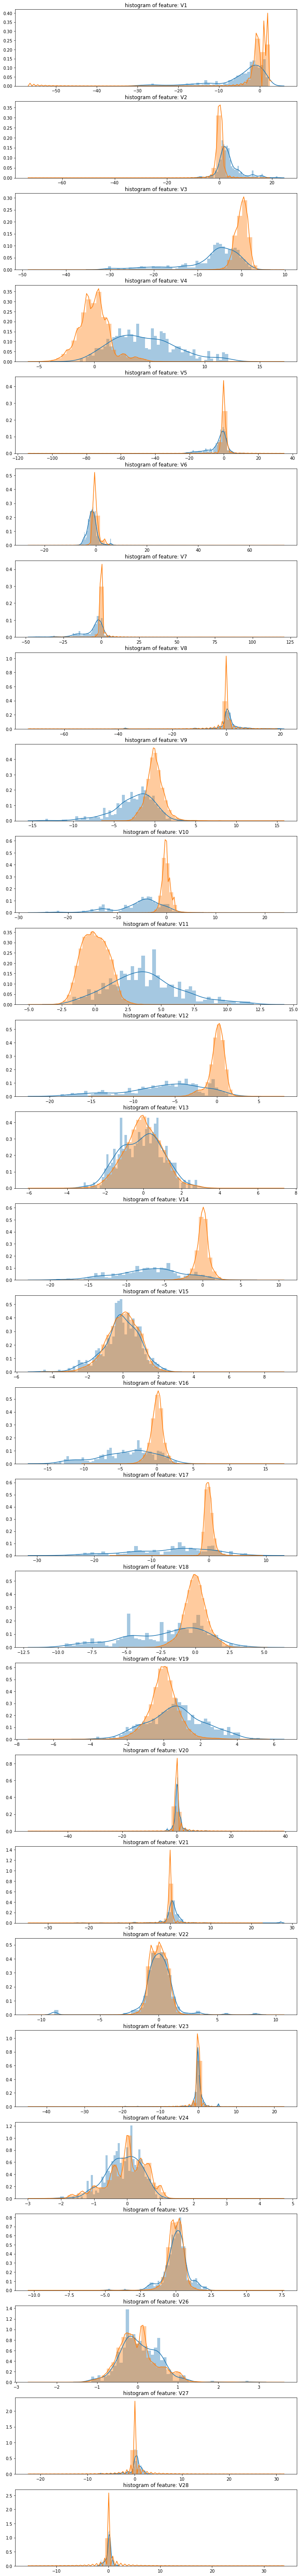

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(crd_df['V'+str(i)][crd_df.Class == 1], bins=50)
    sns.distplot(crd_df['V'+str(i)][crd_df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

In [3]:
# As we can see from the graphs that the data is highly skewed and presense of outliers. 
# We will not remove outliers since we might loose information especially for minority class

In [30]:
#Let's check the correlation between features

joincorr= crd_df.corr()
Tel_filt_df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
Tel_filt_df_corr[((Tel_filt_df_corr[0] < 1) & (Tel_filt_df_corr[0] >= 0.4)) | ((Tel_filt_df_corr[0] <= -0.4) & (Tel_filt_df_corr[0] > -1))]

level_0 level_1         0
93       V3    Time -0.419618
3      Time      V3 -0.419618
91       V2  Amount -0.531409
901  Amount      V2 -0.531409

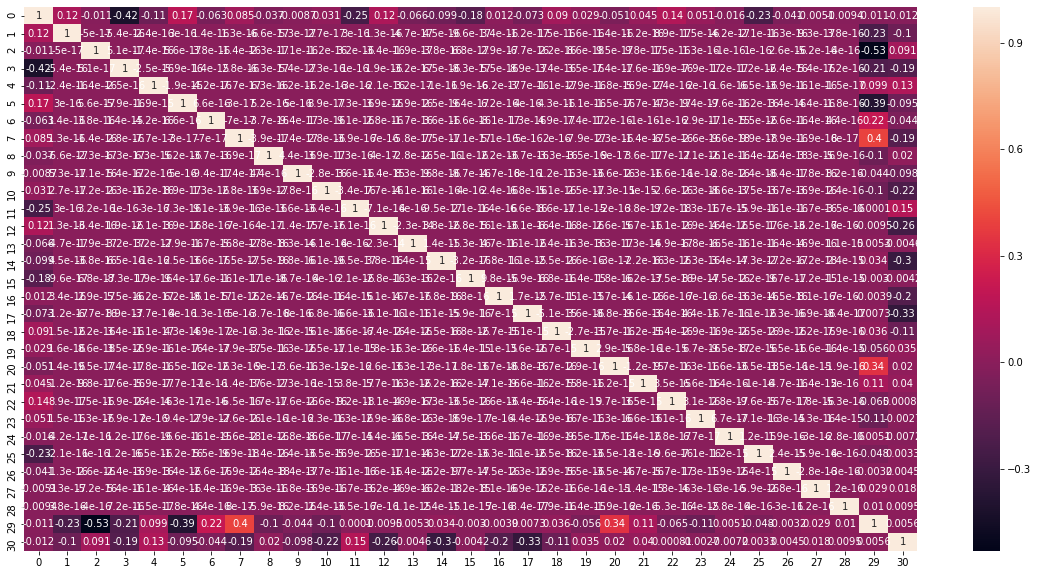

In [31]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(crd_df.transpose())
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

# Train Test Split

In [32]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [33]:
# Get all the columns from the dataFrame
columns = crd_df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
X = crd_df[columns]
y = crd_df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[crd_df['Class'] == 1]), len(y.loc[crd_df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[crd_df['Class'] == 1]), len(y_test.loc[crd_df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[crd_df['Class'] == 1]), len(y_train.loc[crd_df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 199364 199364 | 85443 85443
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 151 0.001767260044708168
Number of frauds on y_train: 341 0.0017104391966453322


In [34]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
341
151


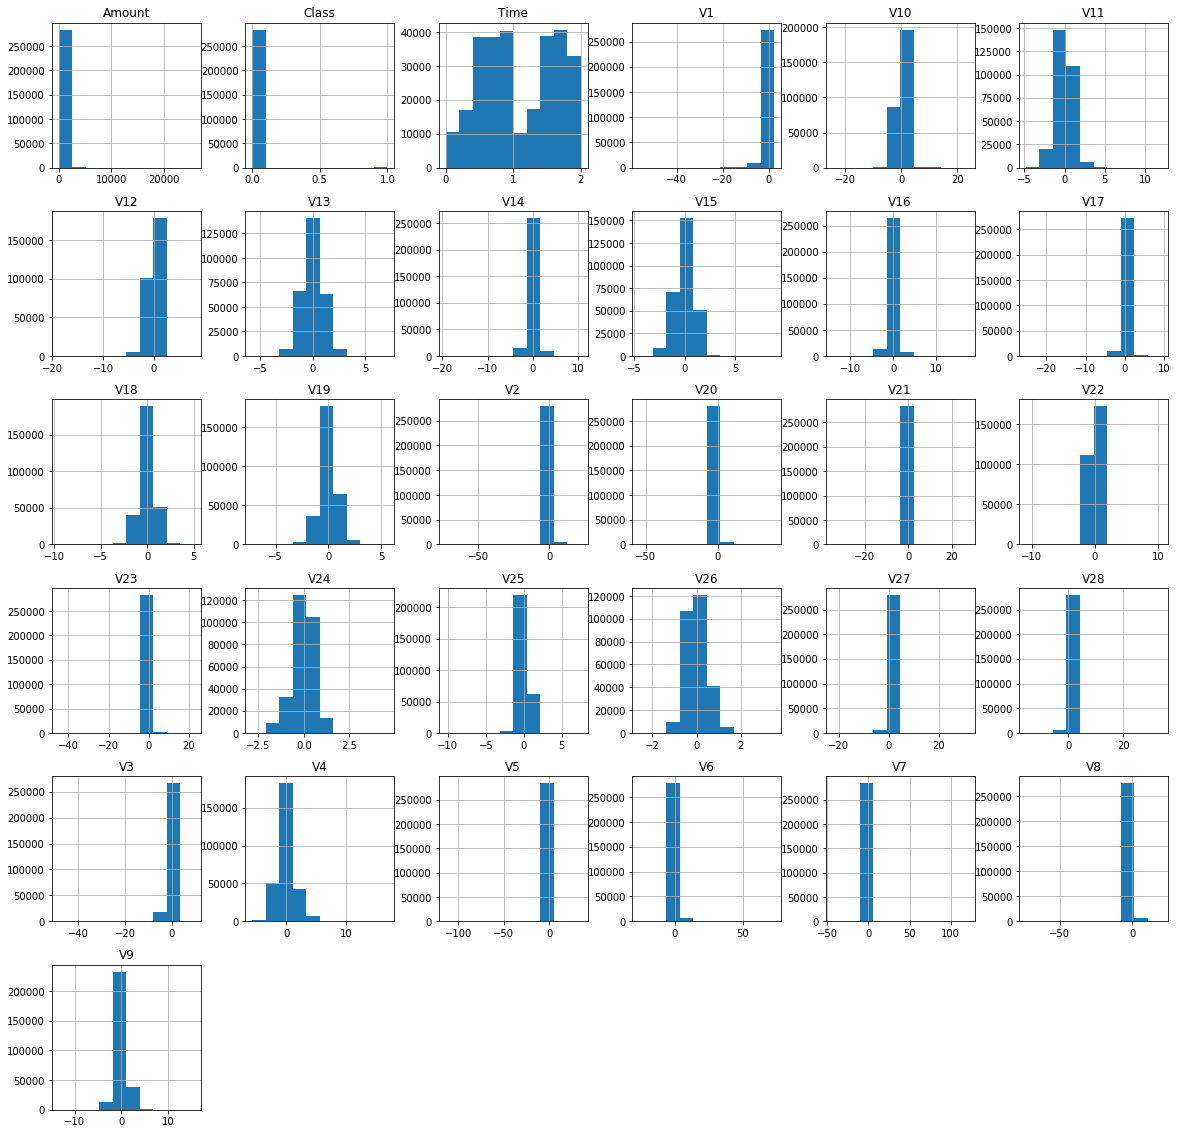

In [35]:
# Plot histograms of each parameter 
crd_df.hist(figsize = (20, 20))
plt.show()

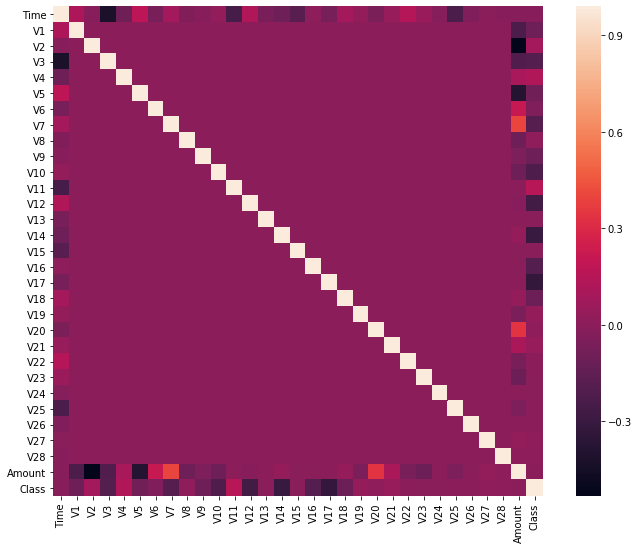

In [36]:
# Correlation matrix
corrmat = crd_df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .99, square = True)
plt.show()

In [37]:
# Based on observation of data overlap above, try out a second dataset with redunancies removed
clean_data = crd_df.drop(['V28','V27','V23','V8'], axis =1)
# Later - can re run everything after running the following line
#data = clean_data

In [38]:
pca_var = ['V%i' % k for k in range(1,29)]

Text(0.5, 1.0, 'V1-V28 Skewnesses')

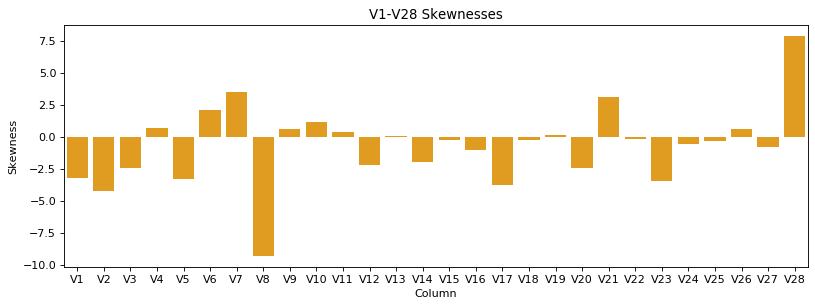

In [39]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_var, y=X_train[pca_var].skew(), color='orange')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

In [40]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train = pt.transform(X_train)    ## Then apply on all data
X_test = pt.transform(X_test)
#X_val_pt = pt.transform(X_val)

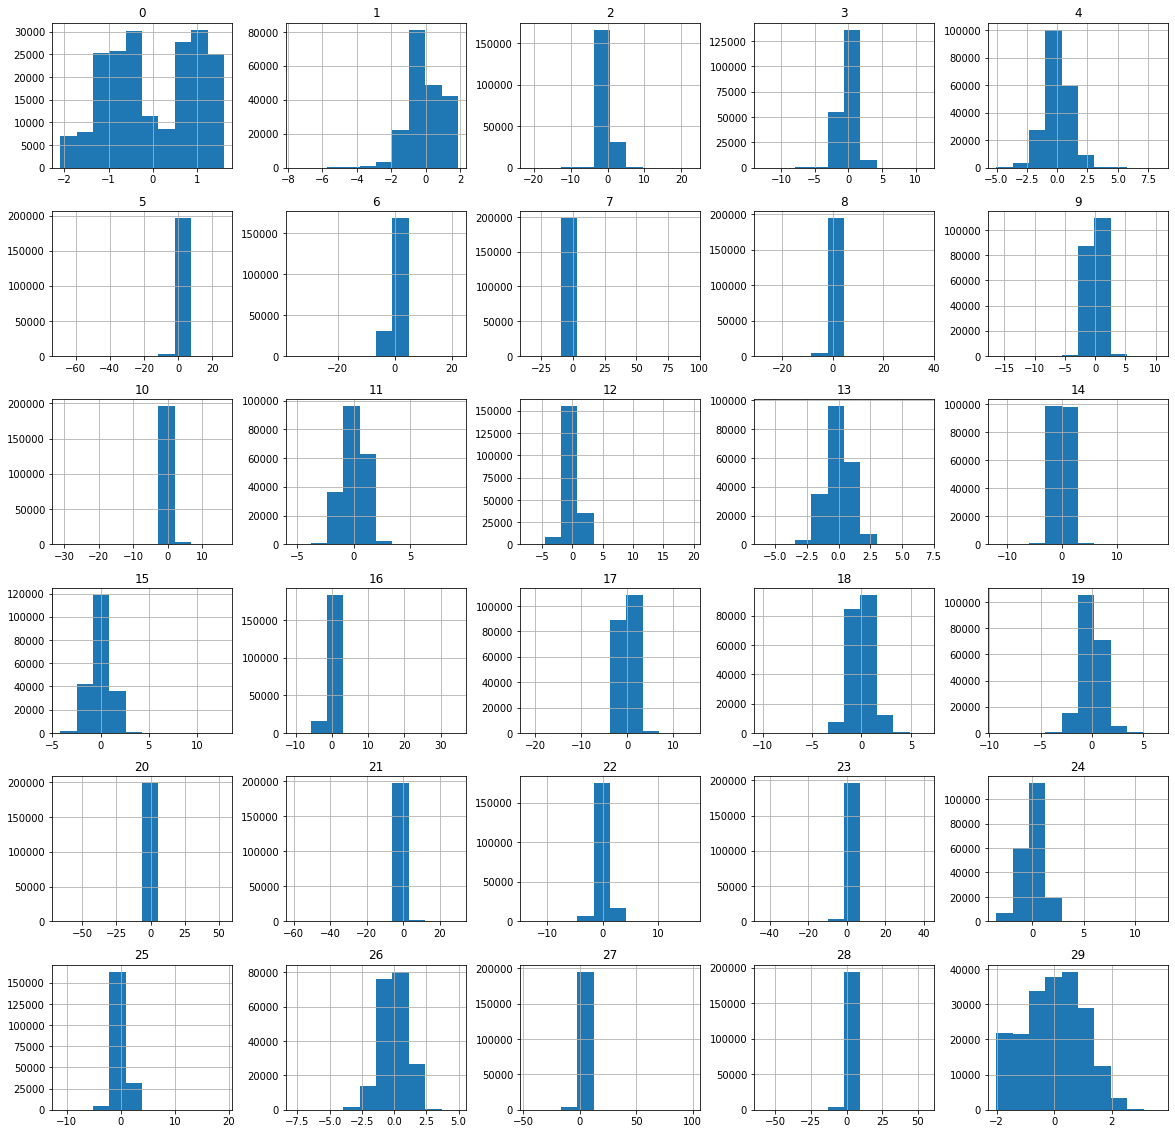

In [41]:
# Plot histograms of each parameter 
pd.DataFrame(X_train).hist(figsize = (20, 20))
plt.show()

# Model Building

# Logistic Regression with out class imbalance

In [42]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

log_reg = LogisticRegression()
model_log = log_reg.fit(X_train,y_train)

In [43]:
#Making prediction on the test data
pred_probs_test = model_log.predict_proba(X_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.97'

In [44]:
def plotLiftChart(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show()

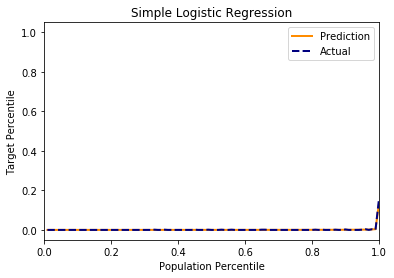

In [45]:
plotLiftChart(y_test.values,pred_probs_test,"Simple Logistic Regression")

Choice of Evaluation Metric
Choosing a metric is one of the key criteria for our analysis, as the dataset is imbalanced one



*Source: Wikipedia*
Accuracy = correct predictions / total predictions = (TP + TN)/ (all) For a data set which is balanced, this might make a good measure. For an imbalanced dataset like the current one, where the negative class is heavier, this measure may show a high accuracy but fail to serve the purpose of the modeling exercise. We need to be able to predict non fradulent transactions i.e.; positive outcomes correctly to help business. So Accuracy may not be the best measure here.

Recall(sensitivity) = ability to identify Positives as true = TP/(TP + FN) Considering that we wish to clearly identify transactions which might be fraudalent vs non-fraudalent, recall as a metric with its ability to identify true positives might be more apt. But this does not capture models ability to mis-classify negative class as positive i.e.; False positive rate. So, if we choose a model purely based on recall, we might be blind sighted by a huge number of false positive.

Precision = TP/ (TP + FP) = Positive predictive value: It is important to not only understand the rate of identifying positives as true but also identify False positives. If business is to find out all fraudalent transactions, it becomes important that the false positive rate should not be too high. So Precision as a metric - which provides the rate of true positive /total predicted positives is an apt metric to look at here.

F Score = 2 * Precision * Recall/ (Precision * Recall): Fscore is the harmonic mean of Precision and Recall and provides the ability to balance the need between having a better true positive rate and not too high a false positive rate.

Area under the Curve:

AUC or in the classification world – AUC ROC – Area under the curve for Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

True positive rate (TPR), recall as described above is proportion of positive data points correctly identified as positive by the model False positive rate (FPR), which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points.

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.

# Logistic Regression - with penalty


In [46]:
from sklearn.feature_selection import RFE

In [47]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [48]:
logmodel_CW_dict.fit(X_train,y_train)

LogisticRegression(C=10000000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=9999, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85292
           1       0.06      0.88      0.11       151

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy for the test dataset 97.6%
ROC for the test dataset 92.8%


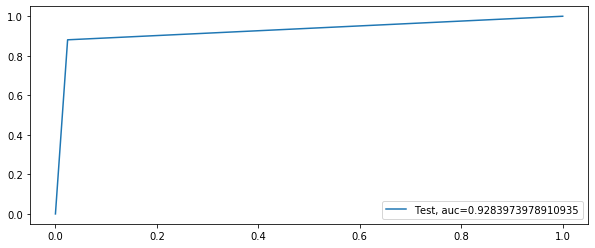

In [49]:
predictions = logmodel_CW_dict.predict(X_test)
prediction_probs = logmodel_CW_dict.predict_proba(X_test)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

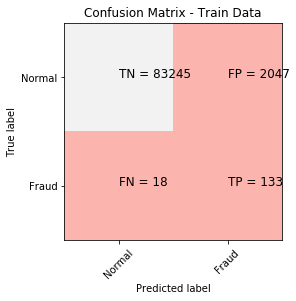

In [50]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

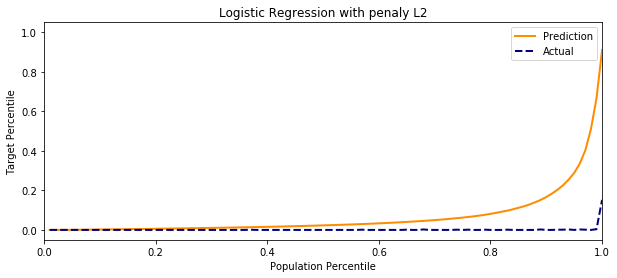

In [51]:
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penaly L2")

### This model gives good recall % (98%) for Majority class but low % (88%) for minority class. 
### Lets review other models to see if they give better recall%

Create Stratefied Kfold Samples
The regular K-Fold cross validation may not be applicable for an imbalanced dataset. As the folds created may not retain class proportions, even if they did, most classifiers need some manipulation of the dataset to balance it (oversampling of positive class or under sampling of negative class). To Cross validate an imbalanced dataset, we might have to apply stratified cross validation. Stratification seeks to ensure that each fold is representative of all classes of the data.

Random Sampling: The given dataset is highly imbalanced. Fruad classes is only 0.17% of the entire dataset. With such a dataset random sampling might not be able to pick up enough data of both the classes Stratified Sampling: Stratified sampling will be able to sample enough data of both the classes. But, considering that the Fruad class is only 0.17% of the entire dataset, stratified sampling might significantly reduce the number of cases, so it should ideally be coupled with a resampling technique to ensure balance in data.

In [52]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [53]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [54]:
searchCV.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.2s remaining:   48.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [55]:
print("final selected 1/lambda is ", searchCV.C_)
print("final selected lambda is ", 1/searchCV.C_)

final selected 1/lambda is  [0.01]
final selected lambda is  [100.]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.92      0.57      0.70       151

    accuracy                           1.00     85443
   macro avg       0.96      0.78      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 96.9%


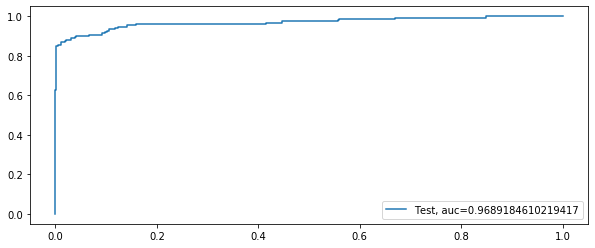

In [56]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


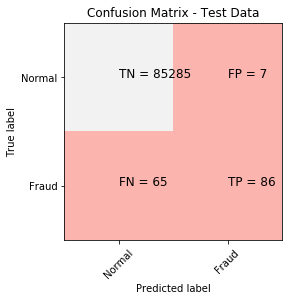

In [57]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

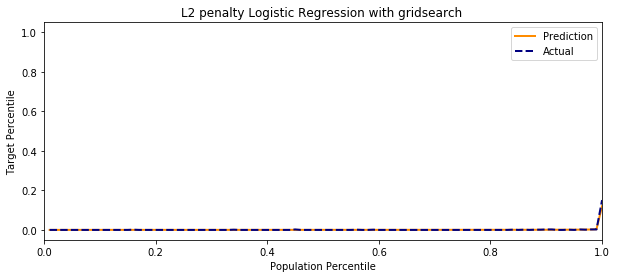

In [58]:
plotLiftChart(y_test.values,preds_L2Search_probs,"L2 penalty Logistic Regression with gridsearch ")

### This model gives good recall % (100%) for Majority class but very low % (57%) for minority class.
### Lets review other models to see if they give better recall%

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [60]:
TrainedRFC= RFC_balanced.fit(X_train,y_train)

C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.38      0.82      0.52       151

    accuracy                           1.00     85443
   macro avg       0.69      0.91      0.76     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.7%
ROC for the test dataset 95.1%


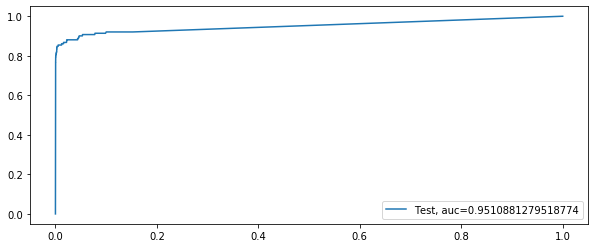

In [61]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

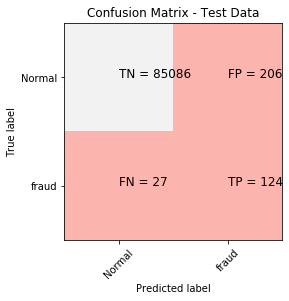

In [62]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','fraud']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

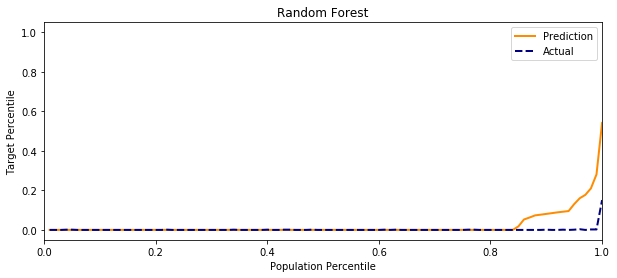

In [63]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest")

### This model gives good recall % (100%) for Majority class and minority class is 82% which is lower than linear regression with penality.
### Lets review other models to see if they give better recall%

In [64]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'value','colName'})
sorted_feature_importance

value colName
0   0.355342     V14
1   0.270230     V11
2   0.090207     V12
3   0.086593     V10
4   0.025568     V17
5   0.023551      V4
6   0.016697      V3
7   0.011808     V20
8   0.010439     V16
9   0.008479      V5
10  0.007574  Amount
11  0.007560      V8
12  0.007308      V7
13  0.007253     V22
14  0.007234     V25
15  0.006850     V21
16  0.006541     V28
17  0.006340     V27
18  0.005847      V9
19  0.005833     V18
20  0.004853     V13
21  0.004511     V15
22  0.004502     V19
23  0.004308     V26
24  0.003541      V2
25  0.003234      V1
26  0.003094     V23
27  0.001851     V24
28  0.001569      V6
29  0.001282    Time

<Figure size 1440x216 with 0 Axes>

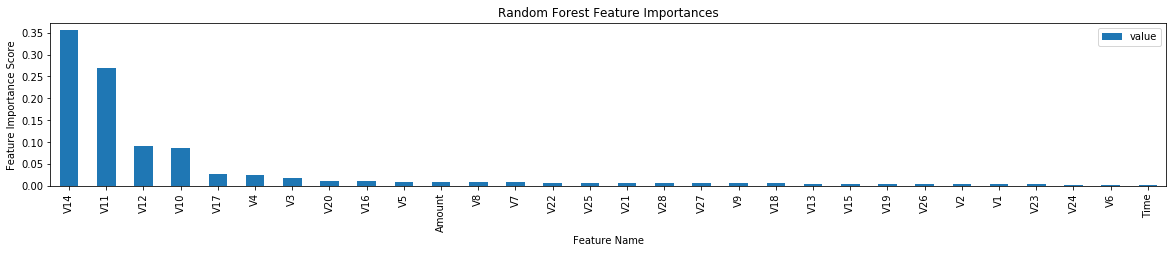

In [66]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(y='value', x='colName' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.show()

# Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85292
           1       0.07      0.81      0.12       151

    accuracy                           0.98     85443
   macro avg       0.53      0.90      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy for the test dataset 97.9%
ROC for the test dataset 89.7%


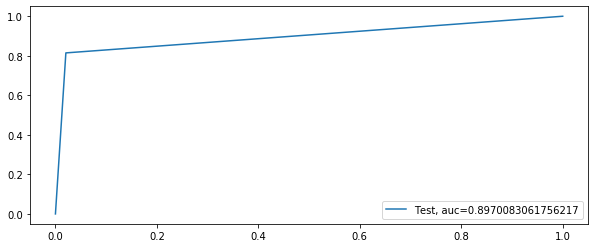

(array([[ 0.60479554, -0.67107336,  0.30340206, ...,  0.85046962,
         -0.01060744,  0.84885596],
        [ 1.34701526,  1.41481834, -0.15552944, ...,  0.12062574,
         -0.04441454, -0.42666183],
        [-1.0165191 , -0.58915727,  0.13076087, ..., -0.72845248,
         -0.88124529, -0.95885331],
        ...,
        [ 1.35265621, -0.77171027,  0.42276984, ..., -1.21507354,
         -0.91588877, -1.24594066],
        [ 1.18099938,  1.35142991, -0.45335494, ..., -0.11531599,
         -0.16430078, -0.60003669],
        [ 1.2578251 ,  1.00235725, -1.19554581, ..., -0.14529635,
         -0.01804614,  1.47515066]]), 176757    0
 261054    0
 54555     0
 107614    0
 132571    0
 16413     0
 10568     1
 251145    0
 66863     0
 244420    0
 41542     0
 256241    0
 212170    0
 18086     0
 125958    0
 262429    0
 257199    0
 167724    0
 254117    0
 102052    0
 27258     0
 8495      0
 269678    0
 210369    0
 75085     0
 9901      0
 194834    0
 27716     0
 205662   

In [135]:
# training the NB model and making predictions
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit
gnb.fit(X_train,y_train)

# predict class
predictions = gnb.predict(X_test)

# predict probabilities
y_pred_proba = gnb.predict_proba(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

X_train,y_train

### This model gives recall % of 98% for Majority class and minority class is very low which is 81%
### Lets review other models to see if they give better recall%

# Ada Boost(Adaptive Boost)

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9992743700478681

In [68]:
# adaboost with the tree as base estimator

estimators = list(range(50, 100, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [69]:
abc_scores

[0.999403110845827,
 0.999403110845827,
 0.9994148145547324,
 0.9994265182636377,
 0.9994382219725431,
 0.9994265182636377,
 0.9994499256814484,
 0.9994733330992591,
 0.9994733330992591,
 0.9994967405170698,
 0.9994616293903538,
 0.9994616293903538,
 0.9994616293903538,
 0.9994733330992591,
 0.9994616293903538,
 0.9994967405170698,
 0.9994733330992591]

Accuracy for the test dataset 99.9%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.94      0.76      0.84       151

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC for the test dataset 88.1%


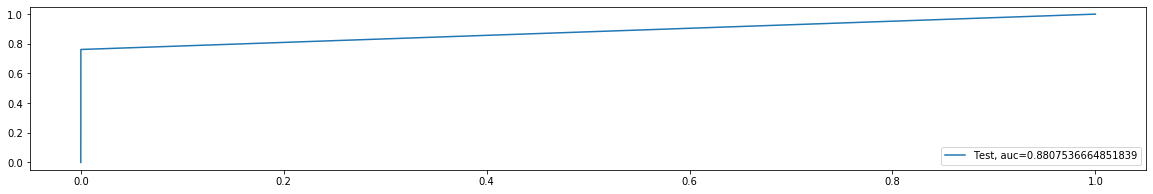

In [70]:
# Let's test on 100 trees
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 100)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### This model gives recall % of 100% for Majority class and minority class is very low which is 76%
### Lets review other models to see if they give better recall%

Resampling techniques for Balancing the data set
Resampling Techniques:
Random under sampling

Balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out. Random Over sampling

Increase the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. Cluster based over sampling

the K-means clustering algorithm is independently applied to minority and majority class instances. This is to identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size. Synthetic Minority Over sampling Technique (SMOTE)

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models. Modified Synthetic Minority Oversampling Technique (MSMOTE)

While the basic flow of MSOMTE is the same as that of SMOTE (discussed in the previous section). In MSMOTE the strategy of selecting nearest neighbors is different from SMOTE. The algorithm randomly selects a data point from the k nearest neighbors for the security sample, selects the nearest neighbor from the border samples and does nothing for latent noise.

# Algorithmic Ensemble Technique:
Bagging Based

Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end Bagging is used for reducing Overfitting in order to create strong learners for generating accurate predictions. Unlike boosting, bagging allows replacement in the bootstrapped sample. Boosting Based

Boosting is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions. Boosting starts out with a base classifier / weak classifier that is prepared on the training data. Different Boosting Methods:

Ada Boost
Gradient Tree Boosting
XG Boost

Random Over Sampling

In [71]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [72]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 341
Before OverSampling, counts of label '0': 199023 



C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (398046, 30)
After OverSampling, the shape of train_y: (398046,) 

After OverSampling, counts of label '1': 199023
After OverSampling, counts of label '0': 199023


# Logistic Regression with penalty
##On resampled dataset

In [73]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [74]:
searchCV.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85292
           1       0.06      0.88      0.10       151

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy for the test dataset 97.3%
ROC for the test dataset 97.4%


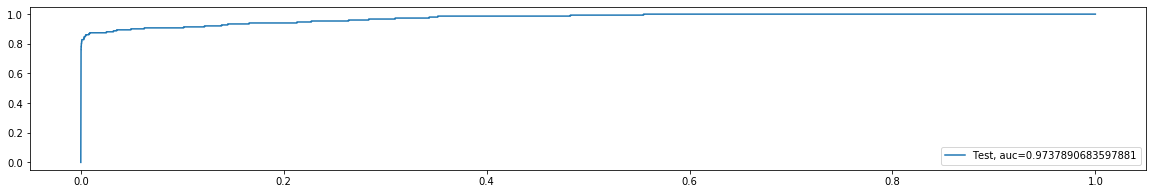

In [75]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


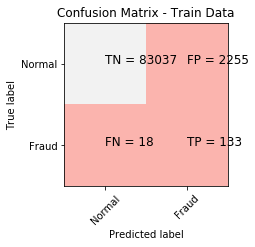

In [76]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

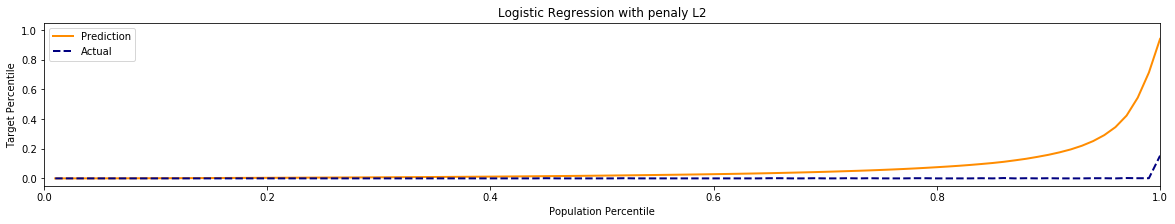

In [77]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with penaly L2")

### This model gives recall % of 97% for Majority class and minority class is 88%
### Lets review other models to see if they give better recall%

# Random Forest
# On resampled dataset

In [78]:
TrainedRFC= RFC_balanced.fit(X_train_res,y_train_res)

C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.67      0.80      0.73       151

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 96.2%


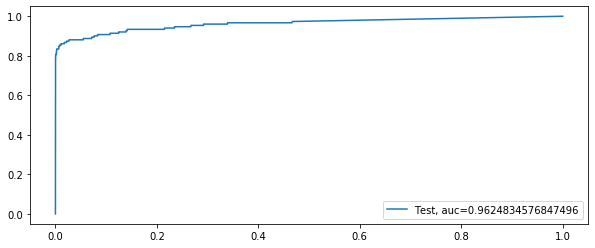

In [79]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

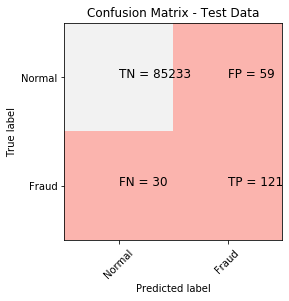

In [80]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

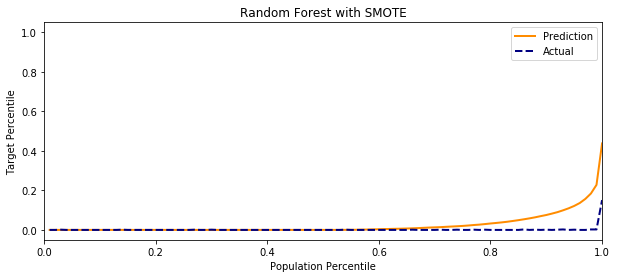

In [81]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

### This model gives recall % of 100% for Majority class and minority class is 80%
### Lets review other models to see if they give better recall%

In [82]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value colName
0   0.360995     V14
1   0.277625     V12
2   0.082484     V10
3   0.071902     V11
4   0.031239     V17
5   0.025749      V4
6   0.013397      V9
7   0.011489      V3
8   0.008552     V16
9   0.008345      V8
10  0.007813  Amount
11  0.007711      V1
12  0.007591     V20
13  0.007409     V18
14  0.006953     V21
15  0.006761     V26
16  0.006215     V19
17  0.006156     V15
18  0.006126      V5
19  0.005960      V6
20  0.005802      V7
21  0.005523      V2
22  0.005325    Time
23  0.005287     V13
24  0.003789     V24
25  0.003586     V22
26  0.003321     V23
27  0.003015     V25
28  0.002034     V27
29  0.001844     V28

<Figure size 720x288 with 0 Axes>

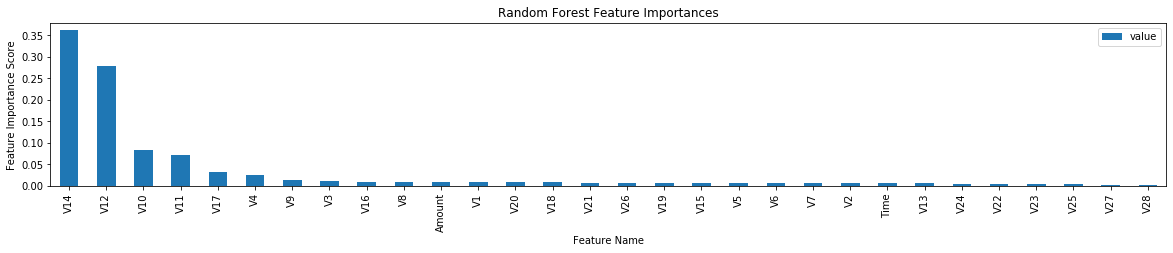

In [83]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

# Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85292
           1       0.06      0.84      0.11       151

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy for the test dataset 97.6%
ROC for the test dataset 90.8%


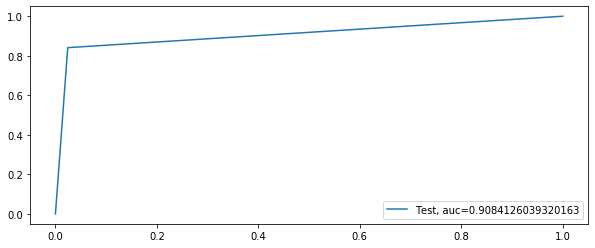

(array([[ 0.60479554, -0.67107336,  0.30340206, ...,  0.85046962,
         -0.01060744,  0.84885596],
        [ 1.34701526,  1.41481834, -0.15552944, ...,  0.12062574,
         -0.04441454, -0.42666183],
        [-1.0165191 , -0.58915727,  0.13076087, ..., -0.72845248,
         -0.88124529, -0.95885331],
        ...,
        [ 1.12810252,  0.96783912,  0.80464554, ..., -0.00391443,
          0.14989527, -1.55480461],
        [ 0.72635449,  0.09706058,  1.06600587, ...,  1.36980404,
          0.68548294,  0.72485969],
        [ 0.60979381, -2.26663294,  3.34648292, ...,  0.56758288,
          2.88108774, -0.1948413 ]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [134]:
# training the NB model and making predictions
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit
gnb.fit(X_train_res,y_train_res)

# predict class
predictions = gnb.predict(X_test)

# predict probabilities
y_pred_proba = gnb.predict_proba(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

X_train_res,y_train_res

### This model gives good recall % (98%) for Majority class and 84% for minority class
### Lets review other models to see if they give better recall%

# XG Boost
## On resampled data

In [85]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [86]:
xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = None,
    scoring='f1_weighted'
)

xgb_model1 = xgb_model.fit(X_train_res,y_train_res)

In [87]:
predictions_train = xgb_model1.predict(X_train_res)
print(classification_report(y_train_res, predictions_train))
predictions = xgb_model1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00    199023

    accuracy                           1.00    398046
   macro avg       1.00      1.00      1.00    398046
weighted avg       1.00      1.00      1.00    398046

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.69      0.83      0.75       151

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [88]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

Accuracy: 99.90%
Precision: 84.52%
Recall: 91.36%
F1 Score: 87.63%
F Beta score: 99.91%
Specificity: 99.93%
Sensitivty: 82.78%


In [89]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

the AUC is : 0.9799


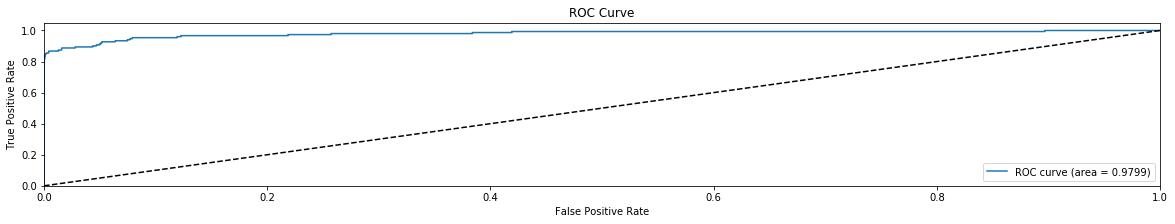

In [90]:
Performance(Model=xgb_model1,Y=y_test,X=X_test)

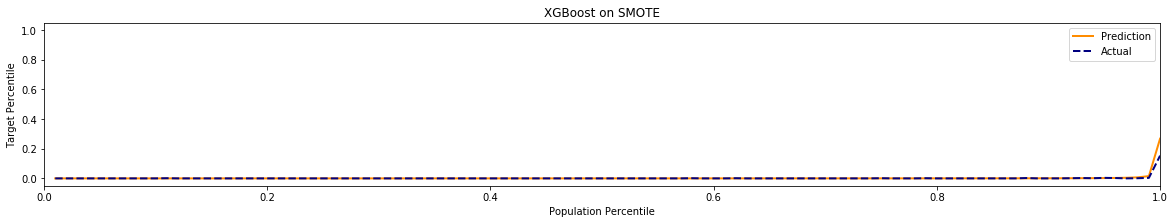

In [91]:
plotLiftChart(y_test.values,xgb_model1.predict_proba(X_test)[:,1],"XGBoost on SMOTE")

### This model gives good recall % (100%) for Majority class and minority class is 83% for test case
### Lets review other models to see if they give better recall%

In [92]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

Importance
Feature            
V10        0.326582
V14        0.283530
V12        0.052144
V17        0.051879
V4         0.036247
V11        0.023906
V8         0.021353
V3         0.019226
V18        0.016373
V6         0.011495
V16        0.010123
Time       0.010106
V5         0.009713
V15        0.009348
V26        0.008965
V25        0.008693
Amount     0.008650
V20        0.008388
V2         0.008045
V9         0.008009
V13        0.007827
V28        0.007727
V19        0.007664
V21        0.007464
V23        0.007438
V24        0.007092
V7         0.006538
V1         0.006330
V27        0.004748
V22        0.004399

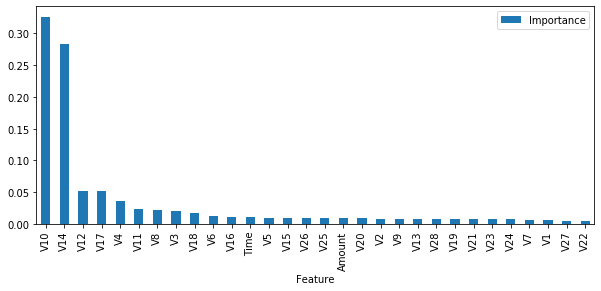

In [93]:
importances[0:50].plot.bar()

In [95]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import ADASYN

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [96]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

ad = ADASYN(random_state=2)
X_train_ad, y_train_ad = ad.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_ad.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ad.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ad==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ad==0)))

Before OverSampling, counts of label '1': 341
Before OverSampling, counts of label '0': 199023 



C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (398041, 30)
After OverSampling, the shape of train_y: (398041,) 

After OverSampling, counts of label '1': 199018
After OverSampling, counts of label '0': 199023


# Logistic Regression with penalty
##On resampled dataset

In [97]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [98]:
searchCV.fit(X_train_ad,y_train_ad)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85292
           1       0.02      0.90      0.04       151

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Accuracy for the test dataset 92.3%
ROC for the test dataset 97.5%


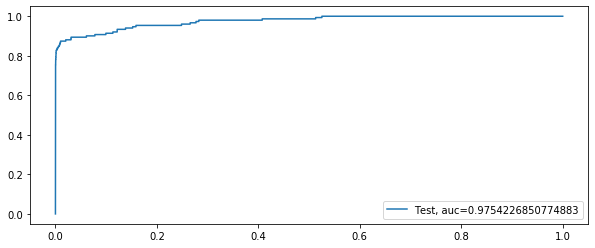

In [99]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


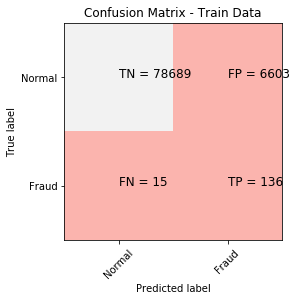

In [100]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

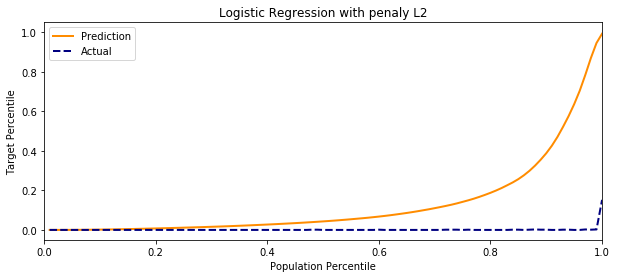

In [101]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with penaly L2")

### This model gives good recall % (91%) for Majority class and  92% for minority class for test case
### Lets review other models to see if they give better recall%

# Random Forest
# On resampled dataset

In [111]:
TrainedRFC= RFC_balanced.fit(X_train_ad,y_train_ad)

C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\antselva\AppData\Local

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.69      0.79      0.74       151

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 96.8%


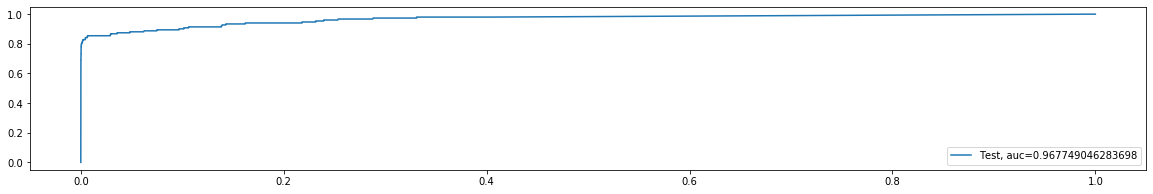

In [112]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### This model gives good recall % (90%) for Majority class but low % (100%) for minority class for test case
### Lets review other models to see if they give better recall%

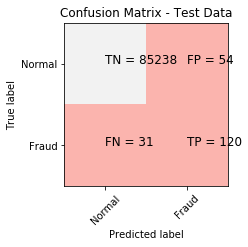

In [113]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

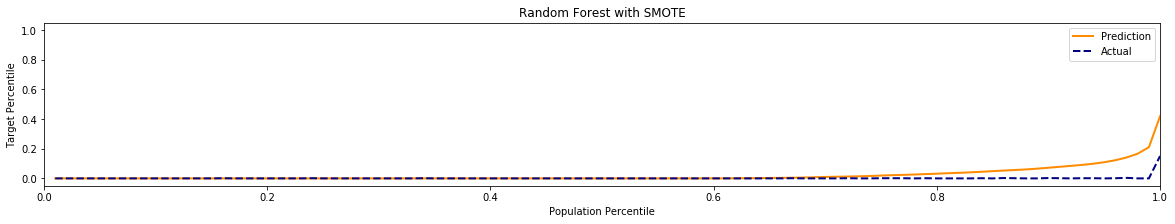

In [114]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

In [115]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value colName
0   0.285475     V14
1   0.147285      V4
2   0.076193     V11
3   0.058643     V12
4   0.054118     V17
5   0.038063      V8
6   0.029837      V3
7   0.022317     V10
8   0.021720     V18
9   0.020557      V6
10  0.020236      V7
11  0.018928     V20
12  0.018634  Amount
13  0.016531      V9
14  0.016008     V15
15  0.013396     V25
16  0.012781     V26
17  0.012111     V21
18  0.011949     V24
19  0.011656      V5
20  0.011608      V1
21  0.011204     V13
22  0.010924     V19
23  0.010383    Time
24  0.010169     V23
25  0.009683     V16
26  0.009504      V2
27  0.007094     V22
28  0.006998     V27
29  0.005998     V28

<Figure size 720x288 with 0 Axes>

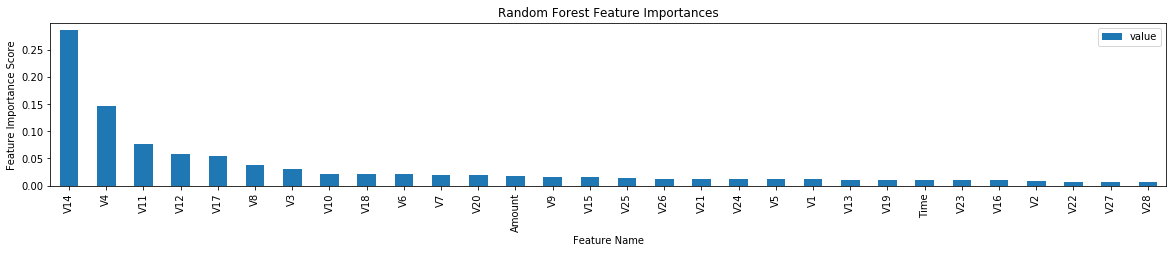

In [116]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

# Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85292
           1       0.04      0.86      0.07       151

    accuracy                           0.96     85443
   macro avg       0.52      0.91      0.52     85443
weighted avg       1.00      0.96      0.98     85443

Accuracy for the test dataset 95.8%
ROC for the test dataset 91.0%


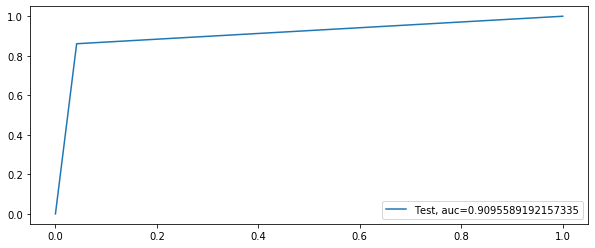

(array([[ 0.60479554, -0.67107336,  0.30340206, ...,  0.85046962,
         -0.01060744,  0.84885596],
        [ 1.34701526,  1.41481834, -0.15552944, ...,  0.12062574,
         -0.04441454, -0.42666183],
        [-1.0165191 , -0.58915727,  0.13076087, ..., -0.72845248,
         -0.88124529, -0.95885331],
        ...,
        [-0.44627731, -0.33412869,  0.92327056, ...,  0.26646163,
          0.32865098, -1.53797727],
        [-0.66270187,  0.57286029,  0.72452525, ...,  0.18031146,
          0.36201038, -1.53797727],
        [-0.68126223,  0.53482631,  0.71294695, ...,  0.21659402,
          0.36024465, -1.53797727]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [133]:
# training the NB model and making predictions
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit
gnb.fit(X_train_ad,y_train_ad)

# predict class
predictions = gnb.predict(X_test)

# predict probabilities
y_pred_proba = gnb.predict_proba(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

X_train_ad,y_train_ad

### This model gives good recall % (91%) for Majority class and  minority class is 96% for test case
### Lets review other models to see if they give better recall%

# XG Boost
## On resampled data

In [118]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [119]:
xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = None,
    scoring='f1_weighted'
)

xgb_model1 = xgb_model.fit(X_train_ad,y_train_ad)

In [121]:
predictions_train = xgb_model1.predict(X_train_ad)
print(classification_report(y_train_ad, predictions_train))
predictions = xgb_model1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00    199018

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.62      0.84      0.71       151

    accuracy                           1.00     85443
   macro avg       0.81      0.92      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [122]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

Accuracy: 99.88%
Precision: 80.96%
Recall: 92.01%
F1 Score: 85.64%
F Beta score: 99.89%
Specificity: 99.91%
Sensitivty: 84.11%


In [123]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

the AUC is : 0.9781


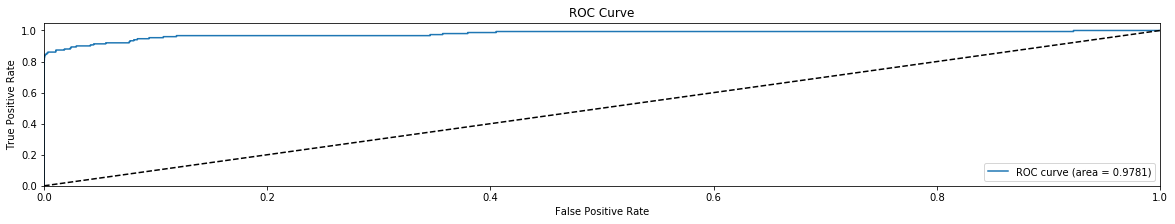

In [124]:
Performance(Model=xgb_model1,Y=y_test,X=X_test)

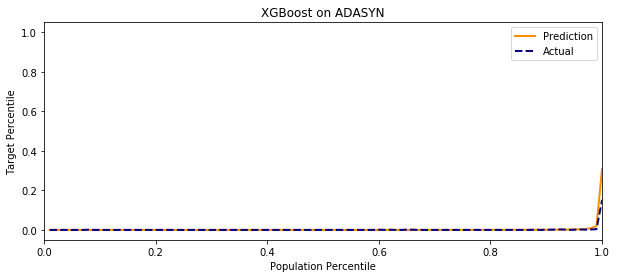

In [126]:
plotLiftChart(y_test.values,xgb_model1.predict_proba(X_test)[:,1],"XGBoost on ADASYN")

In [127]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

Importance
Feature            
V14        0.168074
V4         0.124705
V10        0.084642
V17        0.082902
V8         0.056787
V12        0.039600
V3         0.034765
V18        0.031641
V6         0.029003
V20        0.026922
V15        0.021655
V5         0.020941
V2         0.020854
V25        0.019953
V16        0.018461
V24        0.018373
V21        0.017586
V23        0.017195
V1         0.016568
V26        0.015962
V19        0.015682
V13        0.015317
V9         0.015281
Time       0.015157
V7         0.013482
Amount     0.013228
V28        0.012796
V11        0.012465
V27        0.011744
V22        0.008259

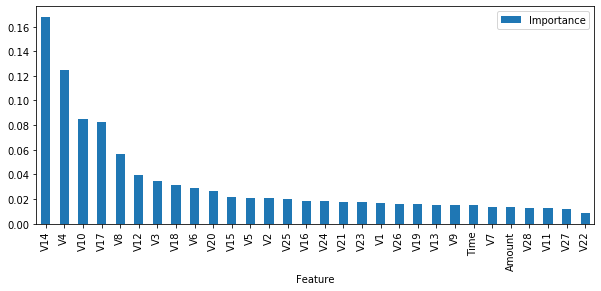

In [129]:
importances[0:30].plot.bar()

### This model gives good recall % (100%) for Majority class and minority class is 84% for test case


## Based on all the model we used, XG Boost on the resampled model gives the best accuracy and recall in train and test data so we will use XG Boost on resampled model 